In [1]:
import requests
import boto3
import s3fs
import json
from pprint import pprint
import xarray as xr
import numpy
import matplotlib
import mpl_toolkits
# from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy


#to make big figures
plt.rcParams['figure.figsize'] = 12, 6

In [2]:
#select SSS L4: 
dataset='podaac-ops-cumulus-protected/OISSS_L4_multimission_7day_v1'

#region of interest:
lonmin = -170.0
latmin = 65.0
lonmax = -120.0
latmax = 80.0

In [3]:
#s3fs
s3_cred_endpoint = {
    'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
    'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

def get_temp_creds():
    temp_creds_url = s3_cred_endpoint['podaac']
    return requests.get(temp_creds_url).json()

temp_creds_req = get_temp_creds()

In [6]:
s3_client = s3fs.S3FileSystem(anon=False,key=temp_creds_req['accessKeyId'], secret=temp_creds_req['secretAccessKey'], token=temp_creds_req['sessionToken'])
contents = s3_client.ls(dataset)
print(contents[0])

podaac-ops-cumulus-protected/OISSS_L4_multimission_7day_v1/OISSS_L4_multimission_global_7d_v1.0_2011-08-28.nc


In [7]:
# file = s3_client.open('podaac-ops-cumulus-protected/OISSS_L4_multimission_7day_v1/OISSS_L4_multimission_global_7d_v1.0_2011-08-28.nc')
# ds = xr.open_dataset(file)

In [10]:
file = s3_client.open(contents[0])
ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:          (longitude: 1440, latitude: 720, time: 1)
Coordinates:
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * time             (time) datetime64[ns] 2011-08-28
Data variables:
    sss              (latitude, longitude, time) float32 ...
    sss_uncertainty  (latitude, longitude, time) float32 ...
Attributes: (12/42)
    Conventions:                   CF-1.8, ACDD-1.3
    standard_name_vocabulary:      CF Standard Name Table v27
    Title:                         Multi-Mission Optimally Interpolated Sea S...
    Short_Name:                    OISSS_L4_multimission_7d_v1
    Version:                       V1.0
    Processing_Level:              Level 4
    ...                            ...
    geospatial_lat_resolution:     [0.25]
    geospatial_lat_units:          degrees_north
    geospatial_lon_min:            [-180.]
    geospatial_lon_max:            [180.]
    geospatial_lon_resolution:     [0.25]
    geospatial_lon_units:          degrees_east

In [7]:
print(ds.time)

<xarray.DataArray 'time' (time: 1)>
array(['2011-08-28T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2011-08-28
Attributes:
    long_name:              center day of a time period over which satellite ...
    standard_name:          time
    axis:                   T
    coverage_content_type:  coordinate


/srv/conda/envs/notebook/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


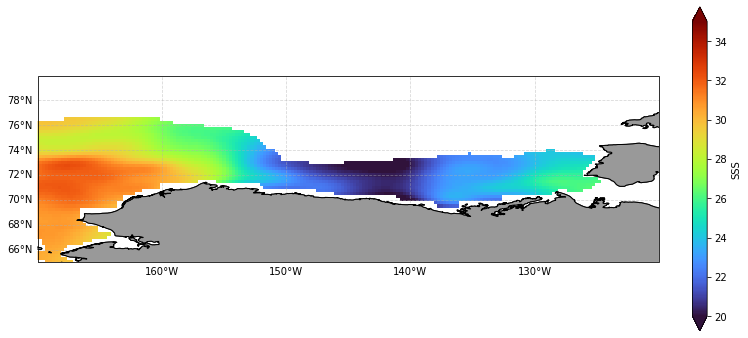

In [8]:
[LO,LA]=numpy.meshgrid(ds.longitude,ds.latitude)
fig = plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=-150))  # Orthographic
extent = [lonmin, lonmax, latmin, latmax]
ax.set_extent(extent, crs=ccrs.PlateCarree())
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
cs = ax.pcolormesh(LO,LA,ds.sss.squeeze(),vmin=20,vmax=35,transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,fraction = 0.022,extend='both')
cb.set_label('SSS',fontsize = 10)

In [ ]:
#can't import Basemap

# latcornerdownleft=68
# loncornerdownleft=-168
# latcornerupright=77
# loncornerupright=-112
# lon0=-150

# [LO,LA]=numpy.meshgrid(ds.longitude,ds.latitude)
# m = Basemap(projection='stere',resolution='h',lat_0=latcornerdownleft,lon_0=lon0,llcrnrlon=loncornerdownleft,urcrnrlon=loncornerupright,llcrnrlat=latcornerdownleft,urcrnrlat=latcornerupright)
# x,y= m(LO,LA)
# fig = plt.figure(figsize=(10,8))
# plt.suptitle(str(ds.time),fontsize=20)
# pa=plt.pcolormesh(x,y,ds.sss.squeeze(),cmap='jet',vmin=20,vmax=35)
# m.drawcoastlines()
# m.fillcontinents(color='#E0E0E0',lake_color='aqua')
# m.drawrivers()
# m.drawparallels(numpy.arange(50,91.,5.))
# m.drawmeridians(numpy.arange(-180.,181.,20.),labels=[True,True,False,True],fontsize=16)
# m.drawmapboundary(fill_color='white')
# lat=numpy.arange(70,91.,5.)
# latlab=[str(70)+u'\N{DEGREE SIGN}',str(70+5)+u'\N{DEGREE SIGN}','','','']
# lon=+lat
# lon[:]=lon0
# xl,yl = m(ds.lon,ds.lat)
# ax = pylab.gca()
# for j in range(0,len(xl)):
#     t = ax.text(xl[j],yl[j],latlab[j],fontsize=16)
# cbar_ax = fig.add_axes([0.1, 0.12, 0.8, 0.04])
# cba = plt.colorbar(pa, cax=cbar_ax,orientation='horizontal')
# cba.set_label('SSS',fontsize=16)
# cmin,cmax = cba.get_clim()
# ticks = numpy.linspace(cmin,cmax,6)
# cba.set_ticks(ticks)
# cba.ax.tick_params(labelsize=16)
# plt.subplots_adjust(right=0.89,left=0.1,bottom=0.2,top=0.9,wspace=0.05)